# Sample release for GW190425

This notebook serves as a basic introduction to loading and viewing data released in associaton with the publication titled
__GW190425: Observation of a compact binary coalescence with total mass $\sim 3.4 M_{\odot}$__ avaliable
through [DCC](https://dcc.ligo.org/LIGO-P190425/public) and [arXiv](https://arxiv.org/abs/2001.01761).

The data used in these tutorials will be downloaded from the public DCC page [LIGO-P2000026](https://dcc.ligo.org/P2000026/public).

The released data file can be read in using the `PESummary` or `h5py` libraries. For this notebook we'll start with simple stuff using h5py. Then we'll use `PESummary v0.7.0` to read the data  files as well as for plotting. For general instructions on how to manipulate the data file and/or read this data file with `h5py`, see the [PESummary docs](https://lscsoft.docs.ligo.org/pesummary/).

In [1]:
# import useful python packages
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
import h5py

Some simple stuff with "vanilla" h5py

Top-level data structures: <KeysViewHDF5 ['PhenomDNRT-HS', 'PhenomDNRT-LS', 'PhenomPNRT-HS', 'PhenomPNRT-LS', 'TaylorF2-HS', 'TaylorF2-LS', 'version']>


 List of Parameters:
('geocent_time', 't0', 'mass_ratio', 'phase', 'network_optimal_snr', 'network_matched_filter_snr', 'logw', 'log_prior', 'log_likelihood', 'lambda_2', 'lambda_1', 'deltaloglV1', 'deltaloglL1', 'deltalogL', 'cos_theta_jn', 'cosalpha', 'azimuth', 'V1_spcal_phase_9', 'V1_spcal_phase_8', 'V1_spcal_phase_7', 'V1_spcal_phase_6', 'V1_spcal_phase_5', 'V1_spcal_phase_4', 'V1_spcal_phase_3', 'V1_spcal_phase_2', 'V1_spcal_phase_1', 'V1_spcal_phase_0', 'V1_spcal_amp_9', 'V1_spcal_amp_8', 'V1_spcal_amp_7', 'V1_spcal_amp_6', 'V1_spcal_amp_5', 'V1_spcal_amp_4', 'V1_spcal_amp_3', 'V1_spcal_amp_2', 'V1_spcal_amp_1', 'V1_spcal_amp_0', 'V1_optimal_snr', 'V1_matched_filter_snr_angle', 'V1_matched_filter_abs_snr', 'L1_spcal_phase_9', 'L1_spcal_phase_8', 'L1_spcal_phase_7', 'L1_spcal_phase_6', 'L1_spcal_phase_5', 'L1_spcal_phase_4', 'L1

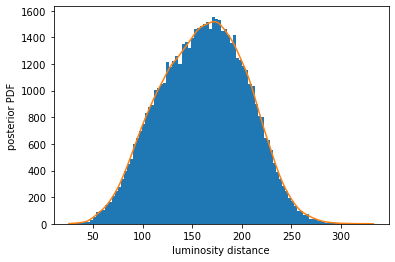

In [2]:
# read in the data
fn = "posterior_samples.h5"
data = h5py.File(fn,'r')

# print out top-level data structures
print('Top-level data structures:',data.keys())
# print out parametrized waveform family names ("approximants" in LIGO jargon).
# HS, LS = high-spin prior and low-spin prior, respectively

# extract posterior samples for one of the approximants
posterior_samples = data['PhenomDNRT-HS']['posterior_samples']

pnames = posterior_samples.dtype.names

print('\n\n List of Parameters:')
print(pnames, '\n')

ind = pnames.index('luminosity_distance')
dL = np.array([samp[ind] for samp in posterior_samples[()]])

print('Number of luminosity samples:', len(dL))
print('Luminosity posterior distribution mean and standard deviation', dL.mean(), dL.std())

# smooth it
from scipy.stats.kde import gaussian_kde
hs = gaussian_kde(dL)

# histogram, and overlay the smoothed PDF
plt.figure()
h, b, o = plt.hist(dL,bins=100)
hsmoothed = hs(b)*len(dL)*(b[1]-b[0])
plt.plot(b,hsmoothed)
plt.xlabel('luminosity distance')
plt.ylabel('posterior PDF')
plt.show()

# release memory for the data
del data

Now use PESummary v0.7.0 to read the data files as well as for plotting. 

In [3]:
# import ligo-specific python packages. 
# pesummary is a ligo-specific python package for reading and plotting the results of Bayesian parameter estimation.
# Install with "pip install pesummary" , and make sure you have version >= 0.7.0.
import pesummary
from pesummary.gw.file.read import read
print(pesummary.__version__)

0.7.0


There are 6 different approximants that were used to analyze __GW190425__ and they are all stored in the data file.

In [4]:
fn = "posterior_samples.h5"
data = read(fn)
labels = data.labels
print(labels)

['PhenomDNRT-HS', 'PhenomDNRT-LS', 'PhenomPNRT-HS', 'PhenomPNRT-LS', 'TaylorF2-HS', 'TaylorF2-LS']


To illustrate the data structure we'll pick one approximant by random and plot its respective data.

In [5]:
samples_dict = data.samples_dict
posterior_samples = samples_dict["PhenomPNRT-HS"]
prior_samples = data.priors["samples"]["PhenomPNRT-HS"]
parameters = posterior_samples.keys()
print(parameters)

dict_keys(['L1_matched_filter_abs_snr', 'L1_matched_filter_snr_angle', 'L1_optimal_snr', 'L1_spcal_amp_0', 'L1_spcal_amp_1', 'L1_spcal_amp_2', 'L1_spcal_amp_3', 'L1_spcal_amp_4', 'L1_spcal_amp_5', 'L1_spcal_amp_6', 'L1_spcal_amp_7', 'L1_spcal_amp_8', 'L1_spcal_amp_9', 'L1_spcal_phase_0', 'L1_spcal_phase_1', 'L1_spcal_phase_2', 'L1_spcal_phase_3', 'L1_spcal_phase_4', 'L1_spcal_phase_5', 'L1_spcal_phase_6', 'L1_spcal_phase_7', 'L1_spcal_phase_8', 'L1_spcal_phase_9', 'V1_matched_filter_abs_snr', 'V1_matched_filter_snr_angle', 'V1_optimal_snr', 'V1_spcal_amp_0', 'V1_spcal_amp_1', 'V1_spcal_amp_2', 'V1_spcal_amp_3', 'V1_spcal_amp_4', 'V1_spcal_amp_5', 'V1_spcal_amp_6', 'V1_spcal_amp_7', 'V1_spcal_amp_8', 'V1_spcal_amp_9', 'V1_spcal_phase_0', 'V1_spcal_phase_1', 'V1_spcal_phase_2', 'V1_spcal_phase_3', 'V1_spcal_phase_4', 'V1_spcal_phase_5', 'V1_spcal_phase_6', 'V1_spcal_phase_7', 'V1_spcal_phase_8', 'V1_spcal_phase_9', 'azimuth', 'cosalpha', 'cos_theta_jn', 'deltalogL', 'deltaloglL1', 'delta

As an example, we'll show the different posterior distributions derived for a single waveform and the posterior distribution derived using the different approximants for the `luminosity_distance` parameter.

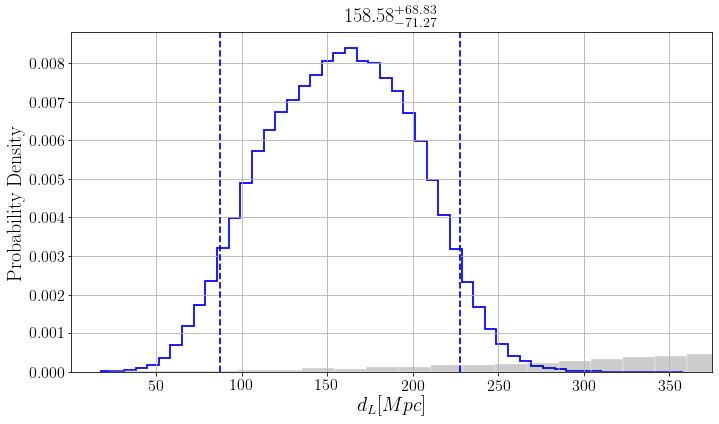

In [6]:
from pesummary.core.plots.plot import _1d_histogram_plot
from pesummary.gw.plots.latex_labels import GWlatex_labels

parameter = "luminosity_distance"
latex_label = GWlatex_labels[parameter]

fig = _1d_histogram_plot(
    parameter, posterior_samples[parameter], latex_label, prior=prior_samples[parameter]
)
fig.set_size_inches(12, 8)
plt.show()

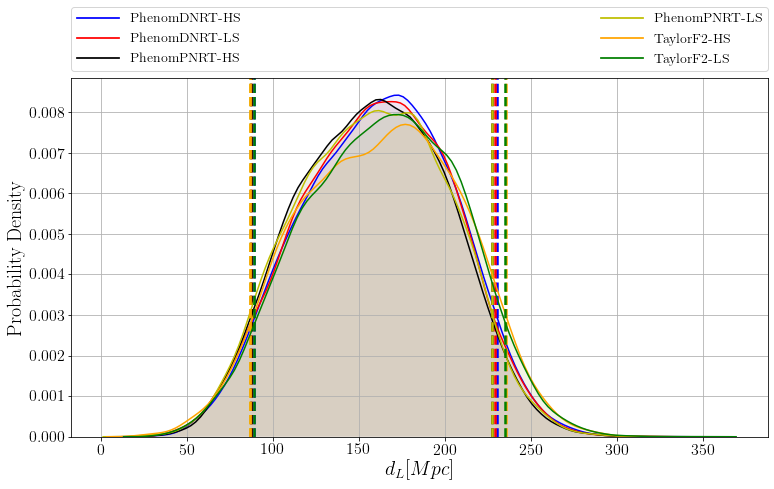

In [7]:
from pesummary.core.plots.plot import _1d_comparison_histogram_plot

samples = []
for label in labels:
    samples.append(samples_dict[label][parameter])
    
colors = ['b', 'r', 'k', 'y', 'orange', 'g']
fig = _1d_comparison_histogram_plot(parameter, samples, colors, latex_label, labels, kde=True)
fig.set_size_inches(12, 8)
plt.show()

The PSDs that were used for each analysis can also be extracted from this file and plotted

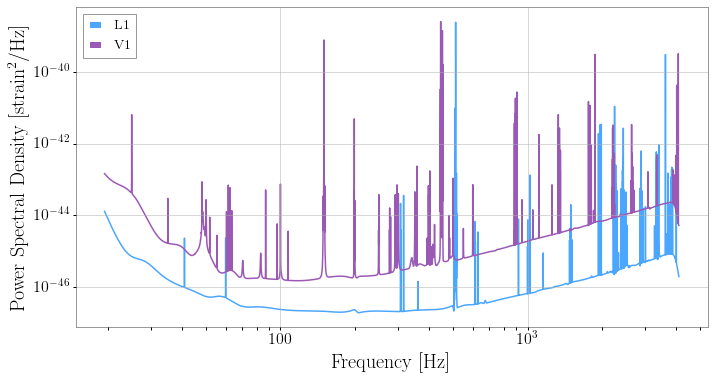

In [8]:
from pesummary.gw.plots.plot import _psd_plot

psd = data.psd["PhenomPNRT-HS"]
ifos = list(psd.keys())
frequencies, strains = [], []
for ifo in ifos:
    frequencies.append(np.array(psd[ifo]).T[0])
    strains.append(np.array(psd[ifo]).T[1])
fig = _psd_plot(frequencies, strains, labels=ifos, fmin=19.4)
fig.set_size_inches(12, 8)
plt.show()

The calibration envelopes that were used in this analysis can also be extracted from this file and plotted

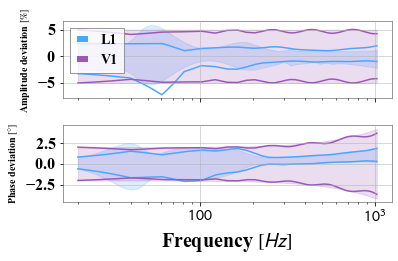

In [9]:
from pesummary.gw.plots.plot import _calibration_envelope_plot

prior = data.priors["calibration"]["PhenomPNRT-HS"]
calibration = data.calibration["PhenomPNRT-HS"]
frequencies = np.arange(20., 1024., 1. / 4)
calibration_data, prior_data = [], []
for ifo in ifos:
    calibration_data.append(np.array(calibration[ifo]))
    prior_data.append(np.array(prior[ifo]))
fig = _calibration_envelope_plot(frequencies, calibration_data, ifos, prior=prior_data)
plt.show()

The configuration file that were used for each analysis can also be extracted from this file

In [10]:
config = data.config["PhenomPNRT-HS"]
for i in config.keys():
    print("[{}]".format(i))
    for key, item in config[i].items():
        print("{}={}".format(key, item))
    print("\n")

[analysis]
coherence-test=False
engine=lalinferencenest
ifos=['L1', 'V1']
nparallel=20
osg=False
roq=True
service-url=https://gracedb.ligo.org/api/
singularity=False
upload-to-gracedb=False


[condor]
accounting_group=ligo.prod.o3.cbc.pe.lalinference
accounting_group_user=gregory.ashton
coherencetest=/home/mpitkin/.conda/envs/gw190425/bin/lalinference_coherence_test
combinePTMCMCh5script=/home/mpitkin/.conda/envs/gw190425/bin/cbcBayesCombinePTMCMCh5s
computeroqweights=/home/mpitkin/.conda/envs/gw190425/bin/lalinference_compute_roq_weights
datafind=/bin/true
gracedb=/home/mpitkin/.conda/envs/gw190425/bin/gracedb
lalinferencebambi=/home/mpitkin/.conda/envs/gw190425/bin/lalinference_bambi
lalinferencedatadump=/home/mpitkin/.conda/envs/gw190425/bin/lalinference_datadump
lalinferencemcmc=/home/mpitkin/.conda/envs/gw190425/bin/lalinference_mcmc
lalinferencenest=/home/mpitkin/.conda/envs/gw190425/bin/lalinference_nest
lalsuite-install=/home/mpitkin/.conda/envs/gw190425
ligo-skymap-from-sample

Plot a large corner plot with all the parameters.  This might take a few minutes.

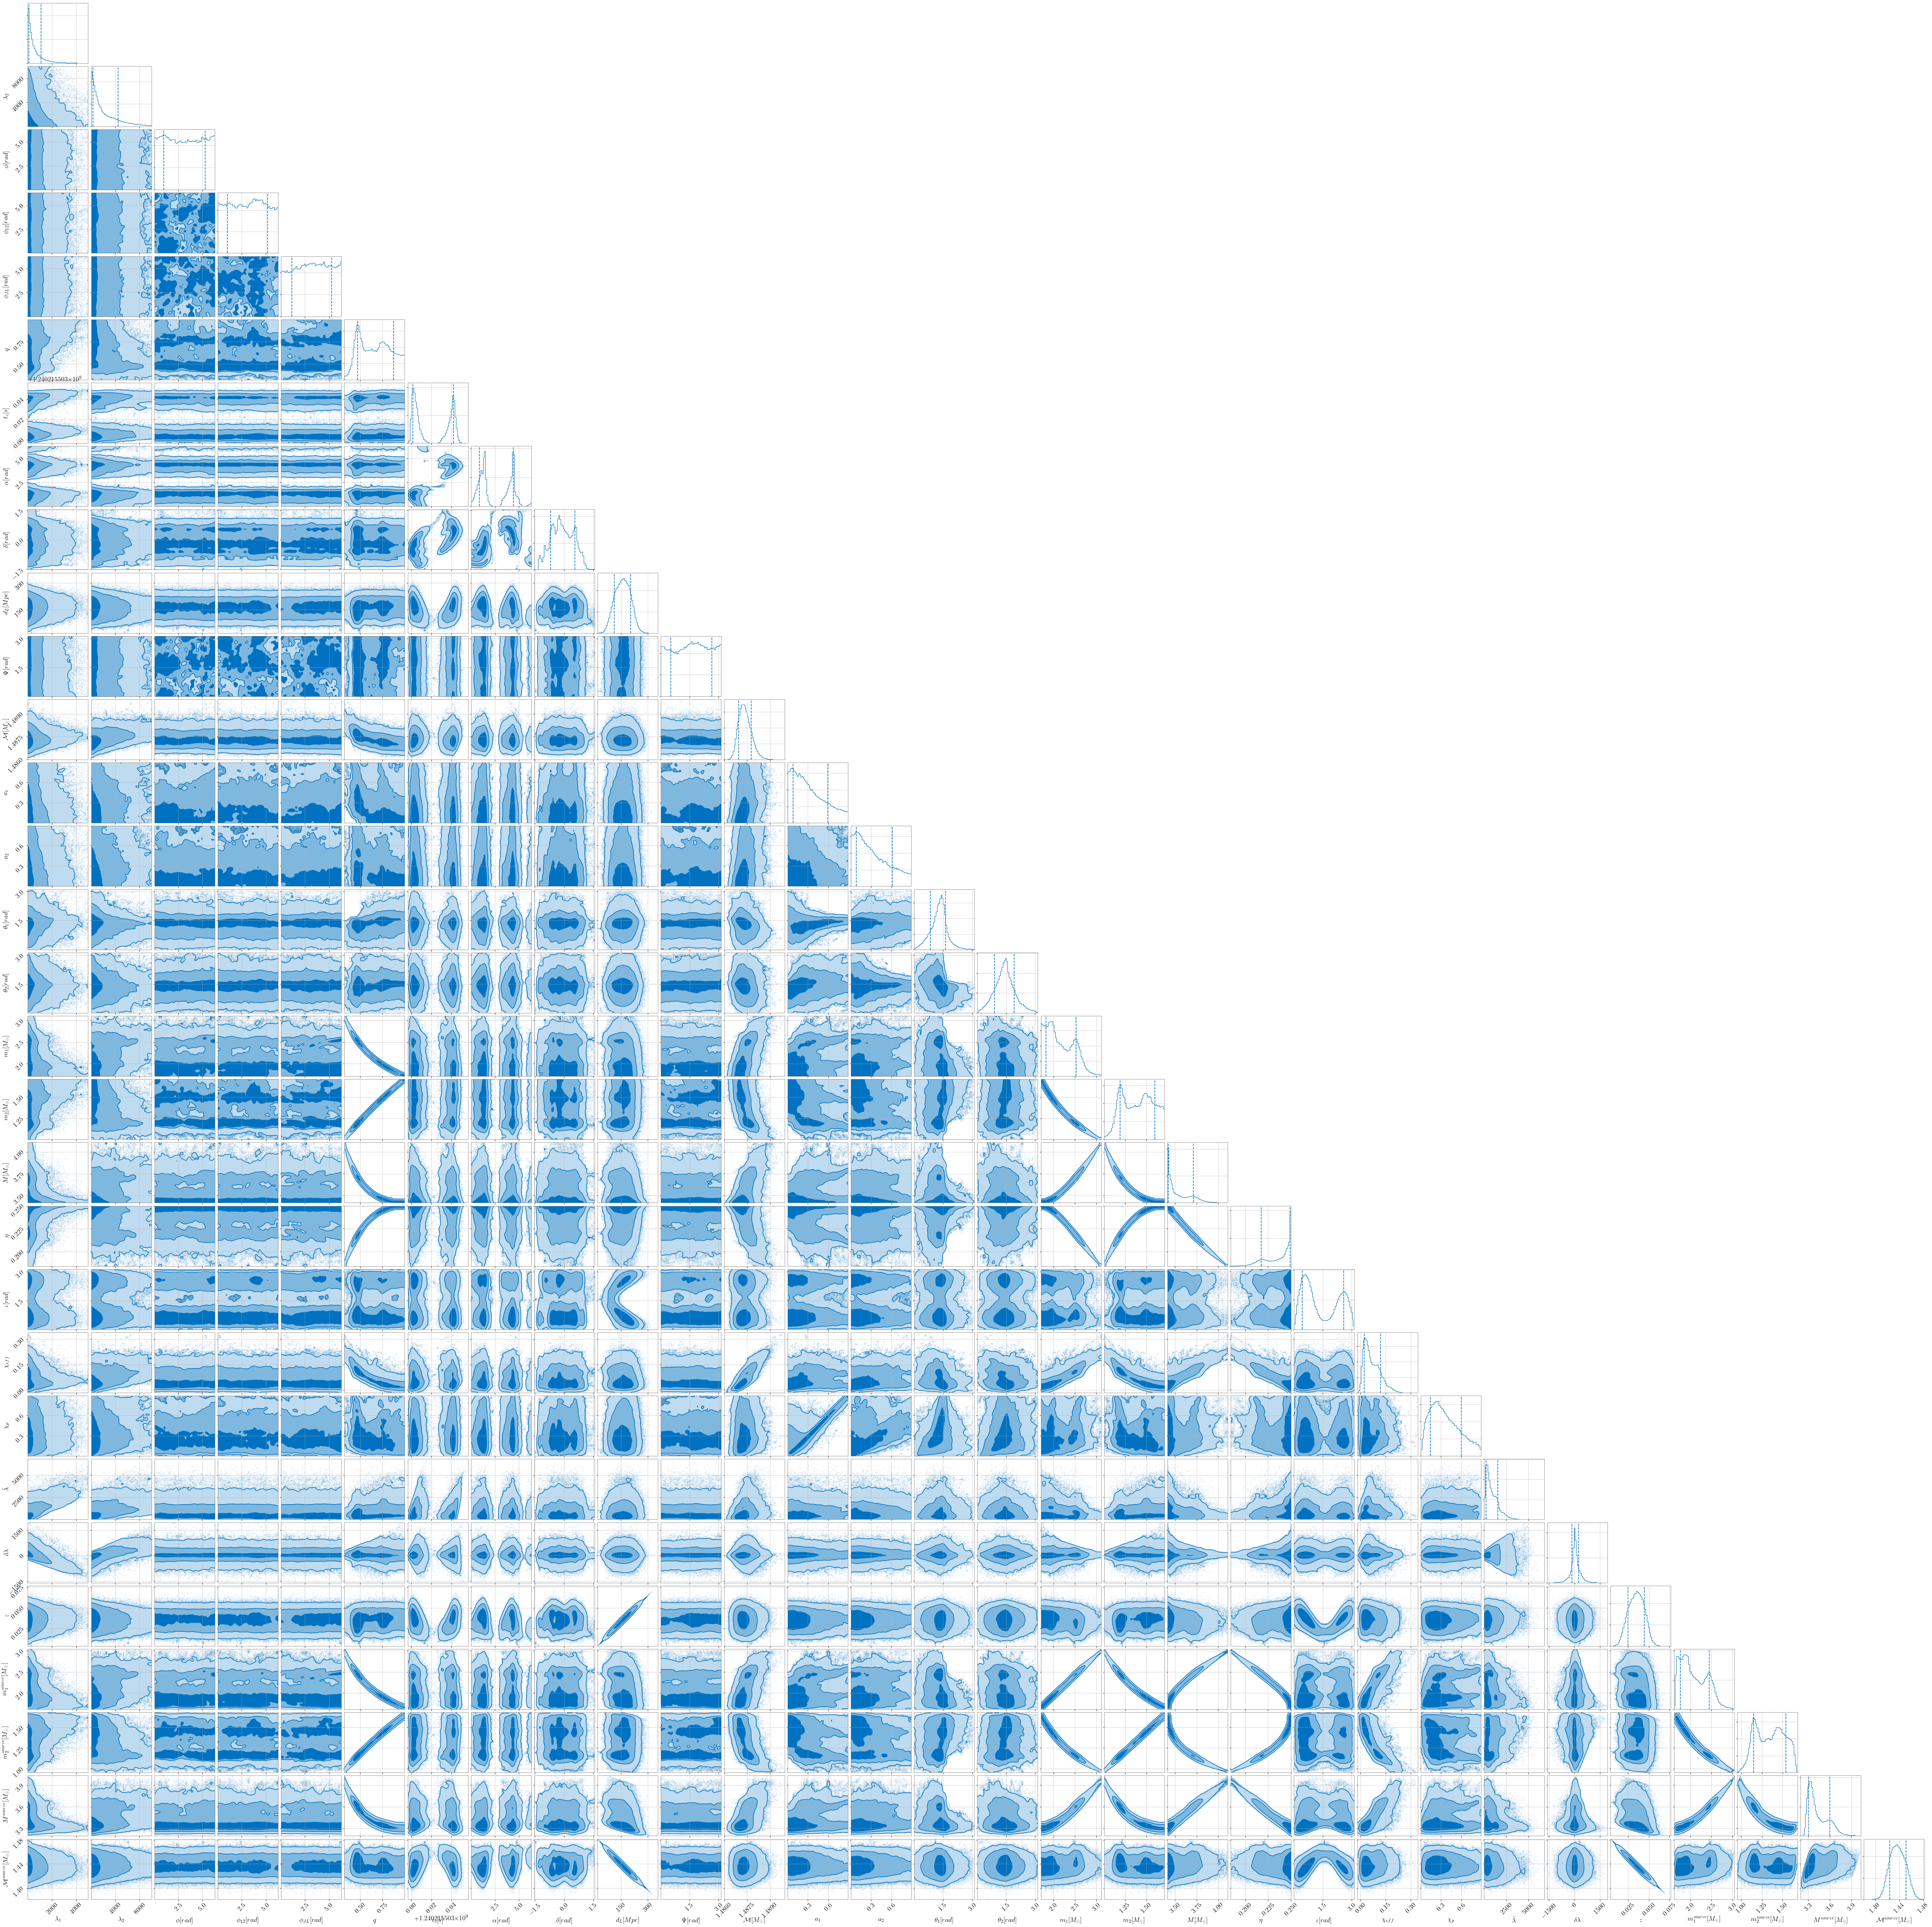

In [11]:
from pesummary.gw.plots.plot import _make_corner_plot
fig = _make_corner_plot(posterior_samples, GWlatex_labels)
plt.show()